In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.datasets import load_iris

In [ ]:
#loading the dataset
iris=load_iris()

In [ ]:
#iris dataframe
irisdf=pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
#retrieving first five data records
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#splitting training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(irisdf,iris.target,test_size=0.15,random_state=10)

In [ ]:
#training data shape
x_train.shape, y_train.shape

((127, 4), (127,))

In [ ]:
#testing data shape
x_test.shape, y_test.shape

((23, 4), (23,))

## 1. Implementing Ridge, Lasso and Linear Regression on Iris Dataset.

In [ ]:
#ridge regression model
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_train_acc=ridge.score(x_train,y_train)*100
ridge_test_acc=ridge.score(x_test,y_test)*100

In [ ]:
#accuracy for ridge regression model
print('Accuracy for Ridge Regression:')
print('Training:',ridge_train_acc,',Testing:',ridge_test_acc)

Accuracy for Ridge Regression:
Training: 93.16119380601894 ,Testing: 91.49366312594027


In [ ]:
#lasso regression model
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_train_acc=lasso.score(x_train,y_train)*100
lasso_test_acc=lasso.score(x_test,y_test)*100

In [ ]:
#accuracy for lasso regression model
print('Accuracy for Lasso Regression:')
print('Training:',lasso_train_acc,',Testing:',lasso_test_acc)

Accuracy for Lasso Regression:
Training: 43.25183672339213 ,Testing: 41.848904218779325


In [ ]:
#linear regression model
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg_train_acc=lin_reg.score(x_train,y_train)*100
lin_reg_test_acc=lin_reg.score(x_test,y_test)*100

In [ ]:
#accuracy for linear regression model
print('Accuracy for Linear Regression:')
print('Training:',lin_reg_train_acc,',Testing:',lin_reg_test_acc)

Accuracy for Linear Regression:
Training: 93.18759524569012 ,Testing: 91.73103340186461


## 2. Plotting accuracies in bar graph.

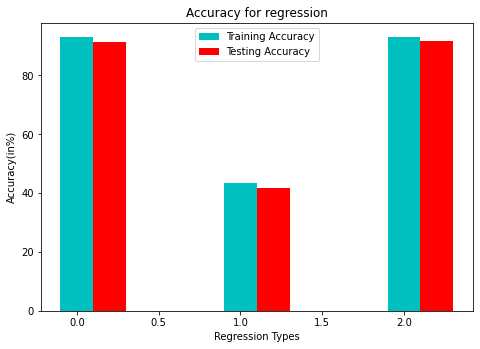

In [ ]:
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, np.array([ridge_train_acc,lasso_train_acc,lin_reg_train_acc]), color = 'c', width = 0.2)
ax.bar(X + 0.2, np.array([ridge_test_acc,lasso_test_acc,lin_reg_test_acc]), color = 'r', width = 0.2)
ax.set_title('Accuracy for regression')
ax.set_xlabel('Regression Types')
ax.set_ylabel('Accuracy(in%)')
ax.legend(labels=['Training Accuracy','Testing Accuracy'])
plt.show()

## 3. Finding best alpha value for ridge and lasso regression.

In [ ]:
#kfold cross validation 
cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=10)

In [ ]:
#ridge cross validation model
ridge_cv=RidgeCV(alphas=np.arange(0,1,0.01),cv=cv,scoring='neg_mean_absolute_error')
ridge_cv.fit(iris.data,iris.target)

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=10),
        fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_absolute_error', store_cv_values=False)

### Best alpha for Ridge Regression.

In [ ]:
ridge_cv.alpha_

0.75

In [ ]:
alpha_lasso=[1e-4, 1e-3, 1e-2, 1, 5]

In [ ]:
#lasso cross validation model
lasso_cv=LassoCV(alphas=alpha_lasso,max_iter=10e5)
lasso_cv.fit(iris.data,iris.target)

LassoCV(alphas=[0.0001, 0.001, 0.01, 1, 5], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=1000000.0, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

### Best alpha for Lasso Regression.

In [ ]:
lasso_cv.alpha_

0.0001

In [ ]:
#coefficients used in lasso regression
coeff_used=np.sum(lasso_cv.coef_!=0)
print("No of features used:",coeff_used)

No of features used: 4


##4. Implementing Lasso and Ridge Regression models with best alpha parameter.

In [ ]:
ridge1=Ridge(alpha=0.75)
ridge1.fit(x_train,y_train)

Ridge(alpha=0.75, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge1_train_acc=ridge1.score(x_train,y_train)*100
ridge1_test_acc=ridge1.score(x_test,y_test)*100

In [ ]:
print('Accuracy for Ridge Regression with best alpha:')
print('Training:',ridge1_train_acc,',Testing:',ridge1_test_acc)

Accuracy for Ridge Regression with best alpha:
Training: 93.17161449423214 ,Testing: 91.54262938032134


In [ ]:
lasso1=Lasso(alpha=0.0001)
lasso1.fit(x_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso1_train_acc=lasso1.score(x_train,y_train)*100
lasso1_test_acc=lasso1.score(x_test,y_test)*100

In [ ]:
print('Accuracy for Lasso Regression with best alpha:')
print('Training:',lasso1_train_acc,',Testing:',lasso1_test_acc)

Accuracy for Lasso Regression with best alpha:
Training: 93.18756093694329 ,Testing: 91.72404372295058


##4. Plotting Accuracies for Lasso and Ridge Regression models with best alpha parameter.

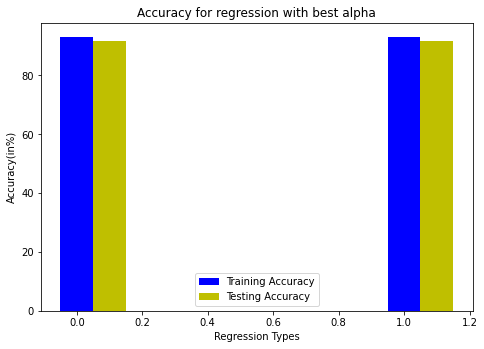

In [ ]:
X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, np.array([ridge1_train_acc,lasso1_train_acc]), color = 'b', width = 0.1)
ax.bar(X + 0.1, np.array([ridge1_test_acc,lasso1_test_acc]), color = 'y', width = 0.1)
ax.set_title('Accuracy for regression with best alpha')
ax.set_xlabel('Regression Types')
ax.set_ylabel('Accuracy(in%)')
ax.legend(labels=['Training Accuracy','Testing Accuracy'])
plt.show()

## Accuracy enhanced for lasso and ridge regression models with best values of parameter alpha.